In [1]:
import numpy as np
import pandas as pd
import scipy.io

from sklearn.decomposition import NMF
from EGD_optimizer import EGD_optim
from EGD import EGD_init, train_EGD
from optuna_opt import optuna_tune
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

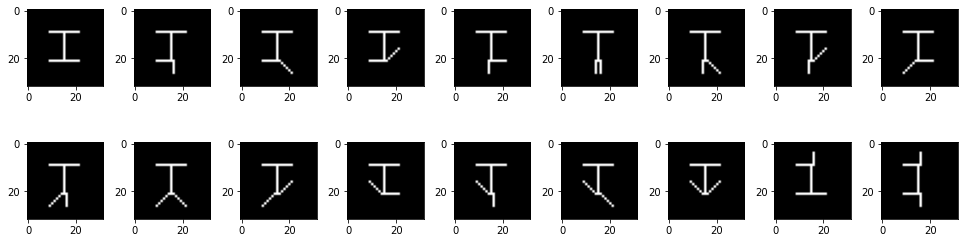

In [2]:
swimmer_dict = scipy.io.loadmat('Q:\AUH-HAEM-FORSK-MutSigDLBCL222\external_data\swimmer_data.mat')

swimmer_mat = swimmer_dict['Y']

num_row = 2
num_col = 9
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(18):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(swimmer_mat[ :, :, i], cmap='gray')
plt.tight_layout()
plt.show()

swimmer_mat = pd.DataFrame(swimmer_mat.reshape(1024, 256).T).replace([1,39], [0,1])

In [3]:
parts = 17

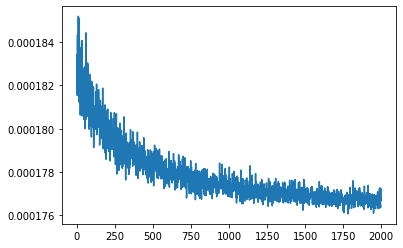

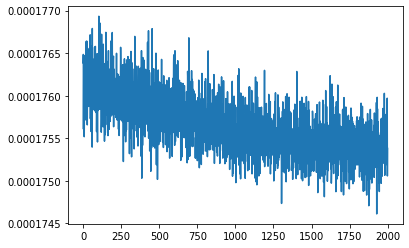

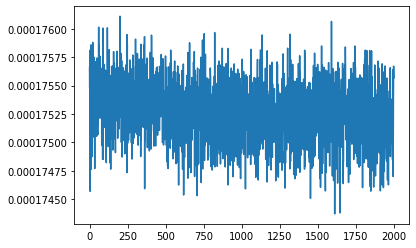

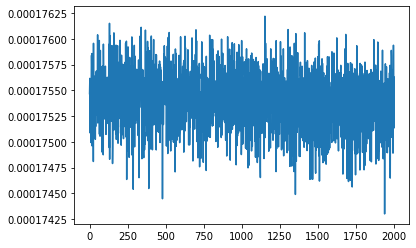

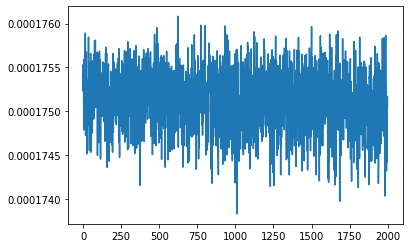

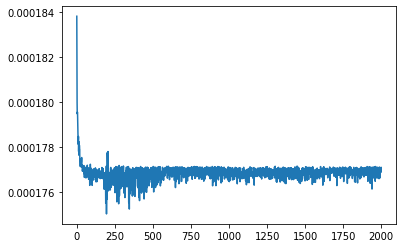

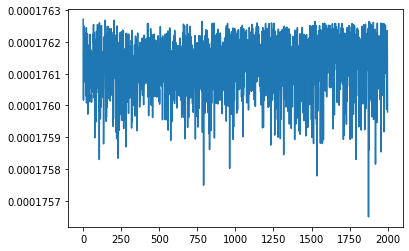

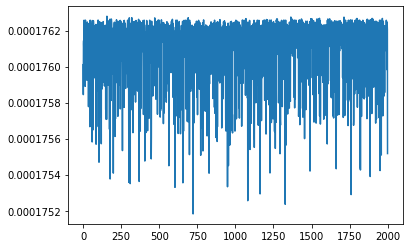

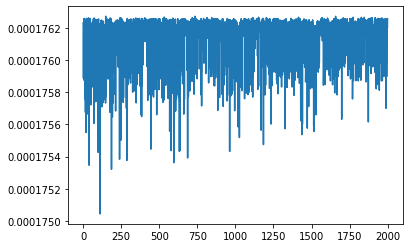

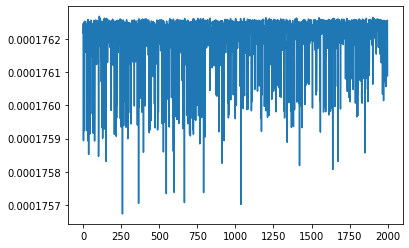

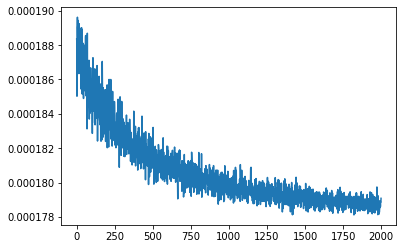

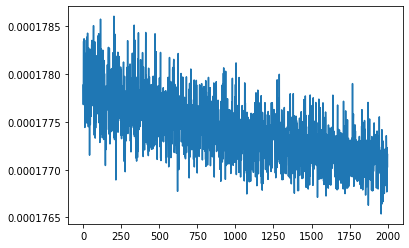

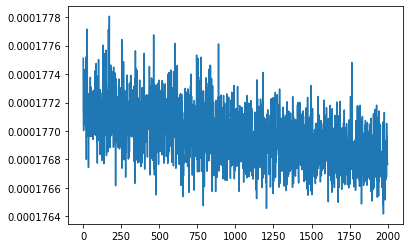

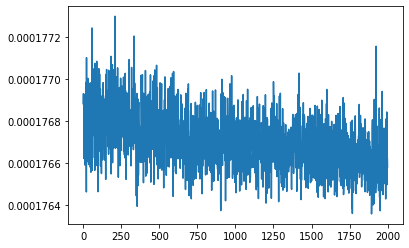

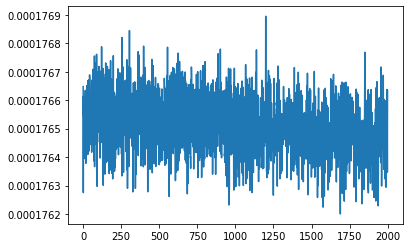

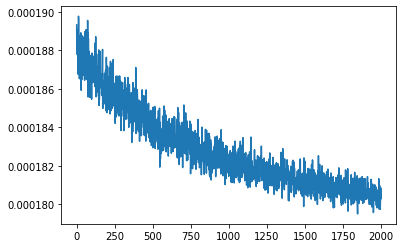

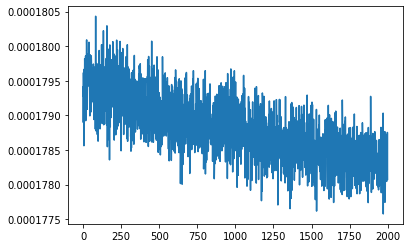

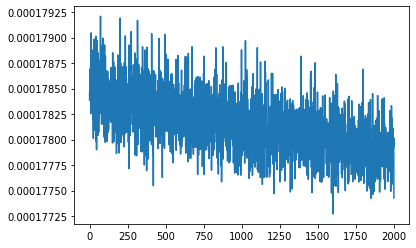

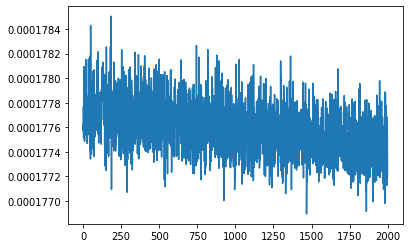

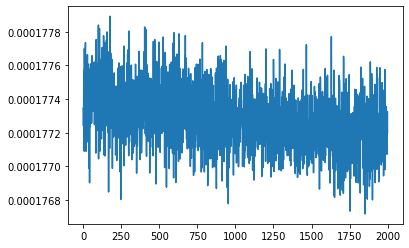

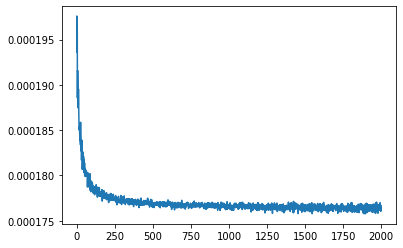

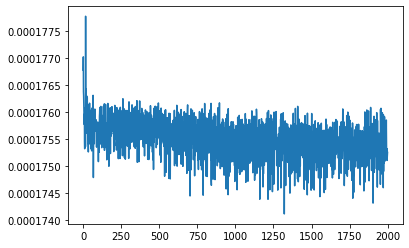

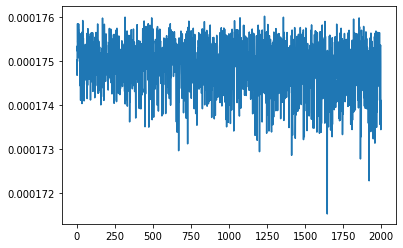

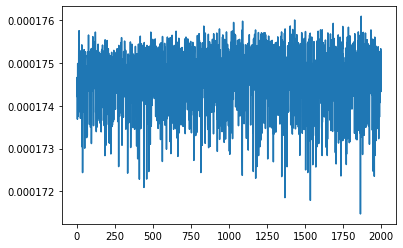

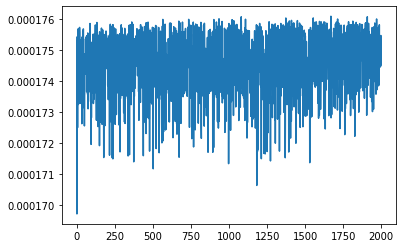

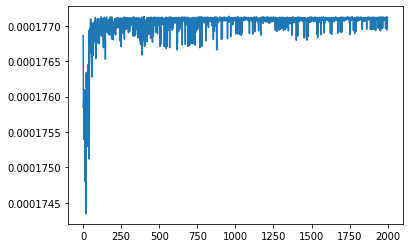

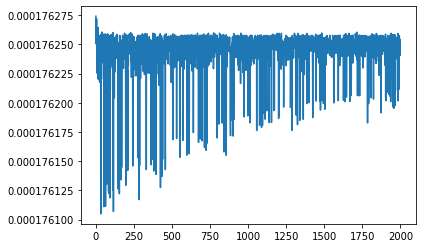

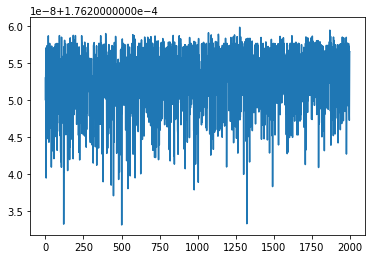

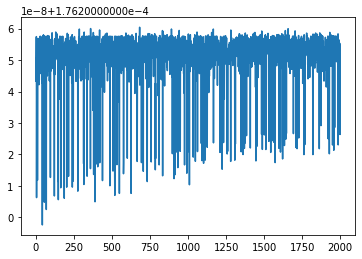

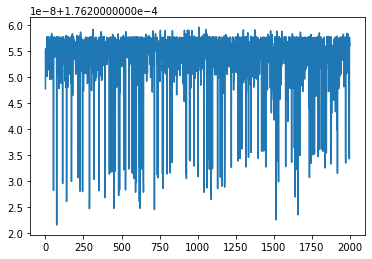

In [4]:
params = optuna_tune(swimmer_mat, parts, model_name = "EGD")

In [5]:
lr2 = params['lr2']
batch_size = params['batch_size']
model = EGD_init(hidden_dim = parts, input_dim = 1024)

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss(reduction='mean')

# Using an Adam Optimizer with lr = 1e-3
#optimizer_dec = torch.optim.Adam(model.dec1.parameters(), lr = lr1)#EGD_optim(model.dec1.parameters(), lr = lr2)

optimizer =  EGD_optim(model.parameters(), lr = lr2)

In [6]:

#turn the training data into a tensor
x_train_tensor = torch.tensor(swimmer_mat.values, 
                            dtype = torch.float32)

#this is what loads makes the updates batch-wise insted of the full data matrix
trainloader = torch.utils.data.DataLoader(x_train_tensor, 
                                            batch_size=batch_size, 
                                            shuffle=True)

loss_list = []
for epoch in range(5000):
    model.train() #set model in traning mode (alternative model.eval())
    loss_p = 0
    for data in trainloader:
        # Output of Autoencoder
        reconstructed = model(data)
        
        # Calculating the loss function
        loss = loss_function(reconstructed, data)
        loss_p =+ loss.item()

        optimizer.zero_grad() #clear old gradients
        #optimizer_dec.zero_grad()
        
        loss.backward() #backpropagation
        
        optimizer.step()#update params
        #optimizer_dec.step()

    loss_list.append(loss_p/x_train_tensor.shape[0])

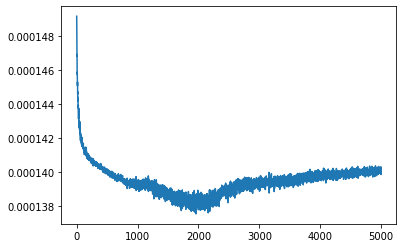

In [7]:
plt.plot(range(5000), loss_list)
plt.show() 

swimmers = model.dec1.weight.data    
swimmers = swimmers.numpy().reshape(32, 32, 17)

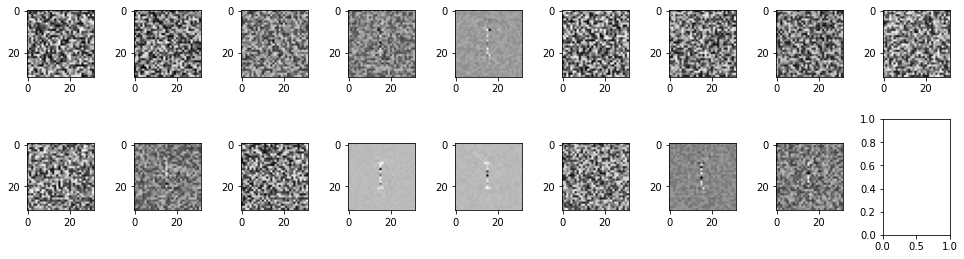

In [8]:

num_row = 2
num_col = 9
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(parts):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(swimmers[ :, :, i], cmap='gray')
plt.tight_layout()
plt.show()

In [ ]:
reconstructed = model.predi
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(parts):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(swimmers[ :, :, i], cmap='gray')
plt.tight_layout()
plt.show()